<a href="https://colab.research.google.com/github/Vicente-Lorenzo/NetworkScience/blob/main/Project_Research.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import networkx as nx               # graphs manipulation
import matplotlib.pyplot as plt     # visualization
import numpy as np                  # auxiliar functions
import random as rand               # Random
import csv
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
airlines_data = pd.read_csv('airlines.csv')
G = nx.Graph()
edges = [(row['src_iata'], row['dest_iata']) for _, row in airlines_data.iterrows()]
G.add_edges_from(edges)

In [3]:
airlines_data

,airline,airline_id,src_iata,src_id,dest_iata,dest_id,codeshare,stops,equipment
0,2B,410,AER,2965,KZN,2990,NaN,0,CR2
1,2B,410,ASF,2966,KZN,2990,NaN,0,CR2
2,2B,410,ASF,2966,MRV,2962,NaN,0,CR2
3,2B,410,CEK,2968,KZN,2990,NaN,0,CR2
4,2B,410,CEK,2968,OVB,4078,NaN,0,CR2
...,...,...,...,...,...,...,...,...,...
67658,ZL,4178,WYA,6334,ADL,3341,NaN,0,SF3
67659,ZM,19016,DME,4029,FRU,2912,NaN,0,734
67660,ZM,19016,FRU,2912,DME,4029,NaN,0,734
67661,ZM,19016,FRU,2912,OSS,2913,NaN,0,734


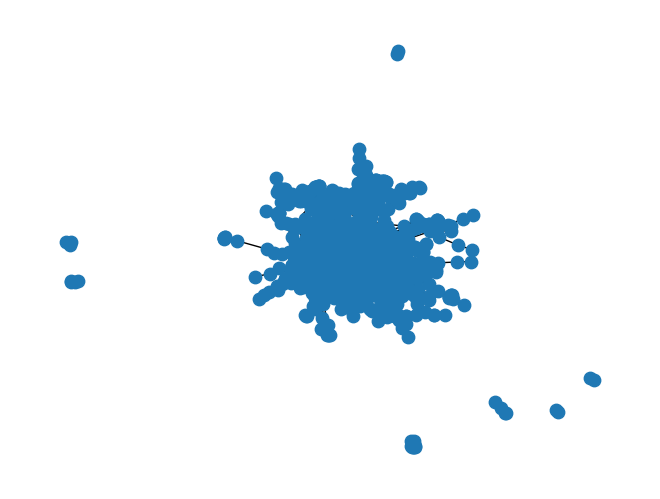

In [4]:
nx.draw(G,node_size=80)
plt.show()

In [5]:
# Assuming you have already created the graph 'G' using the provided code
# Assuming you have also read the 'airlines.csv' data into a DataFrame called 'airlines_data'

# Find connected components (subgraphs) in the graph
connected_components = list(nx.connected_components(G))

# Sort the connected components by size (number of nodes)
connected_components.sort(key=len, reverse=True)

# Get the largest connected component (main graph)
largest_component = connected_components[0]

# Get the nodes in the largest connected component
largest_component_nodes = set(largest_component)

# Find nodes in other connected components (subgroups)
subgroup_nodes = []
for component in connected_components[1:]:
    subgroup_nodes.extend(list(component))

print("Nodes in the largest connected component:")
print(largest_component_nodes)

print("\nNodes in the subgroups not connected to the main graph:")
print(subgroup_nodes)

Nodes in the largest connected component:
{'CKB', 'STX', 'GHE', 'GRU', 'MMY', 'PLN', 'YNO', 'SLW', 'SLU', 'IPH', 'AZR', 'MYG', 'LRD', 'WLH', 'AMS', 'XIC', 'HFA', 'YCU', 'YLW', 'EYK', 'YPW', 'BEU', 'CAK', 'KWL', 'YMO', 'ACI', 'ORV', 'TMS', 'CIF', 'SFJ', 'YPX', 'KUZ', 'SVL', 'FRS', 'NBX', 'URT', 'VUS', 'BGF', 'MBE', 'BGM', 'SVQ', 'KEF', 'KSF', 'GRW', 'XMH', 'HAC', 'DBQ', 'BEN', 'CNF', 'RRG', 'DCM', 'SYR', 'PYJ', 'BSS', 'PBO', 'DRS', 'KNX', 'GMA', 'CZS', 'GGW', 'AUC', 'BIS', 'TAH', 'YVQ', 'LIS', 'YSY', 'CAG', 'GTE', 'BEL', 'YQB', 'HMI', 'LAS', 'LPQ', 'IIL', 'IGU', 'BRD', 'KAZ', 'PRH', 'KOK', 'FNT', 'NRT', 'HLZ', 'YYH', 'ELM', 'LAO', 'BVC', 'VXC', 'VLS', 'GKA', 'PVK', 'YFJ', 'ESB', 'PMY', 'IOT', 'KID', 'CGB', 'GRR', 'MJD', 'URY', 'KEP', 'MSA', 'ZLT', 'ACV', 'BAX', 'EAU', 'BTH', 'ISE', 'ENE', 'OGD', 'VCS', 'KBV', 'JKG', 'GIZ', 'SDD', 'MIA', 'MNT', 'JAC', 'ELV', 'ORH', 'CIC', 'DNK', 'BGG', 'MCO', 'IRG', 'PHX', 'TXK', 'VHC', 'KPB', 'AKX', 'AYP', 'AKL', 'OMR', 'AXU', 'SKN', 'NNT', 'MRD', 'XKS'

In [6]:
G.remove_nodes_from(subgroup_nodes)

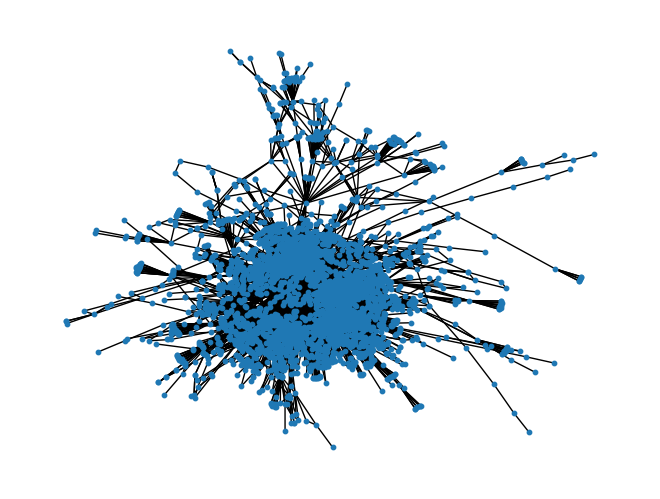

In [7]:
nx.draw(G,node_size=10)
plt.show()

In [8]:
# get the degree for each node
nx.degree(G)

DegreeView({'AER': 18, 'KZN': 21, 'ASF': 7, 'MRV': 16, 'CEK': 14, 'OVB': 53, 'DME': 190, 'NBC': 7, 'TGK': 1, 'UUA': 3, 'EGO': 9, 'KGD': 10, 'GYD': 39, 'LED': 113, 'SVX': 67, 'NJC': 9, 'NUX': 10, 'BTK': 4, 'IKT': 28, 'HTA': 9, 'KCK': 1, 'ODO': 1, 'UKX': 1, 'ULK': 2, 'YKS': 23, 'MJZ': 6, 'AYP': 1, 'LIM': 57, 'CUZ': 5, 'PEM': 2, 'HUU': 1, 'IQT': 4, 'PCL': 3, 'TPP': 3, 'ABJ': 21, 'BOY': 2, 'OUA': 15, 'ACC': 30, 'BKO': 16, 'DKR': 32, 'COO': 20, 'LFW': 16, 'NIM': 9, 'BOG': 74, 'GYE': 19, 'UIO': 26, 'CLO': 18, 'SCY': 1, 'OCC': 2, 'BDS': 19, 'ZRH': 137, 'BOD': 49, 'BRS': 73, 'GVA': 101, 'LPA': 83, 'LCA': 55, 'RMF': 4, 'TFS': 85, 'AJR': 1, 'LYC': 2, 'ARN': 124, 'GEV': 4, 'HAD': 4, 'JKG': 2, 'KRF': 2, 'KSD': 2, 'MHQ': 3, 'OER': 1, 'POR': 3, 'TRF': 30, 'VBY': 4, 'VHM': 2, 'VXO': 6, 'HMV': 1, 'KOK': 2, 'TKU': 7, 'OSL': 105, 'ADQ': 8, 'AOS': 2, 'KKB': 2, 'KLN': 2, 'KOZ': 2, 'OLH': 1, 'KZB': 1, 'SYB': 2, 'KYK': 1, 'ORI': 2, 'KPR': 1, 'BSO': 1, 'MNL': 78, 'BXU': 2, 'CBO': 1, 'CGY': 5, 'CRM': 1, 'DGT'

In [9]:
# graph degree frequency
nx.degree_histogram(G)

[0,
 753,
 736,
 403,
 237,
 163,
 110,
 84,
 84,
 78,
 47,
 43,
 36,
 32,
 18,
 23,
 18,
 19,
 26,
 26,
 22,
 19,
 12,
 16,
 7,
 8,
 16,
 3,
 7,
 13,
 15,
 7,
 14,
 10,
 6,
 10,
 2,
 9,
 14,
 7,
 4,
 13,
 3,
 4,
 4,
 5,
 2,
 8,
 5,
 6,
 6,
 5,
 4,
 1,
 3,
 7,
 3,
 7,
 4,
 3,
 1,
 4,
 3,
 2,
 3,
 2,
 2,
 3,
 2,
 3,
 2,
 0,
 4,
 2,
 3,
 2,
 1,
 2,
 3,
 1,
 2,
 4,
 1,
 3,
 0,
 4,
 3,
 1,
 0,
 3,
 2,
 2,
 2,
 2,
 2,
 2,
 2,
 1,
 2,
 0,
 0,
 1,
 1,
 3,
 2,
 2,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 2,
 2,
 1,
 1,
 0,
 2,
 0,
 0,
 0,
 1,
 0,
 2,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 2,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 0,
 3,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 2,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,

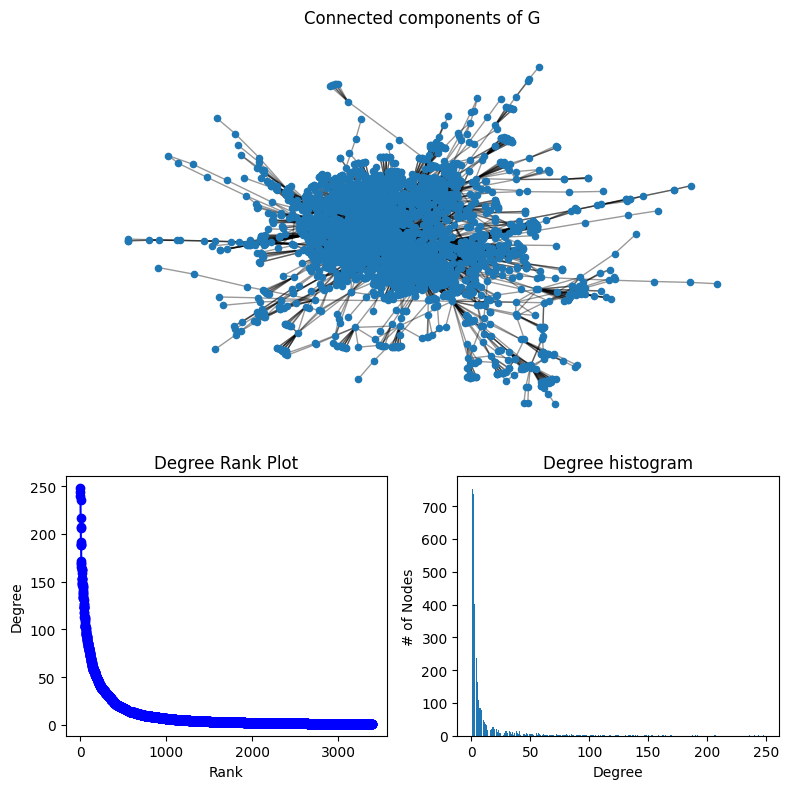

In [16]:
degree_sequence = sorted((d for n, d in G.degree()), reverse=True)
dmax = max(degree_sequence)

fig = plt.figure("Degree of a random graph", figsize=(8, 8))
# Create a gridspec for adding subplots of different sizes
axgrid = fig.add_gridspec(5, 4)

ax0 = fig.add_subplot(axgrid[0:3, :])
Gcc = G.subgraph(sorted(nx.connected_components(G), key=len, reverse=True)[0])
pos = nx.spring_layout(Gcc, seed=10396953)
nx.draw_networkx_nodes(Gcc, pos, ax=ax0, node_size=20)
nx.draw_networkx_edges(Gcc, pos, ax=ax0, alpha=0.4)
ax0.set_title("Connected components of G")
ax0.set_axis_off()

ax1 = fig.add_subplot(axgrid[3:, :2])
ax1.plot(degree_sequence, "b-", marker="o")
ax1.set_title("Degree Rank Plot")
ax1.set_ylabel("Degree")
ax1.set_xlabel("Rank")

ax2 = fig.add_subplot(axgrid[3:, 2:])
ax2.bar(*np.unique(degree_sequence, return_counts=True))
ax2.set_title("Degree histogram")
ax2.set_xlabel("Degree")
ax2.set_ylabel("# of Nodes")

fig.tight_layout()
plt.show()

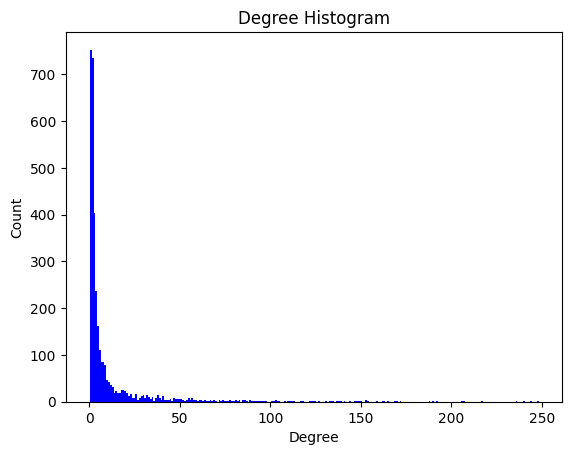

In [20]:
# Plot the degree histogram as a bar plot
degree_hist = nx.degree_histogram(G)
plt.bar(range(len(degree_hist)), degree_hist, width=1.0, color='b')

# Add labels and title
plt.xlabel('Degree')
plt.ylabel('Count')
plt.title('Degree Histogram')

# Show the plot
plt.show()


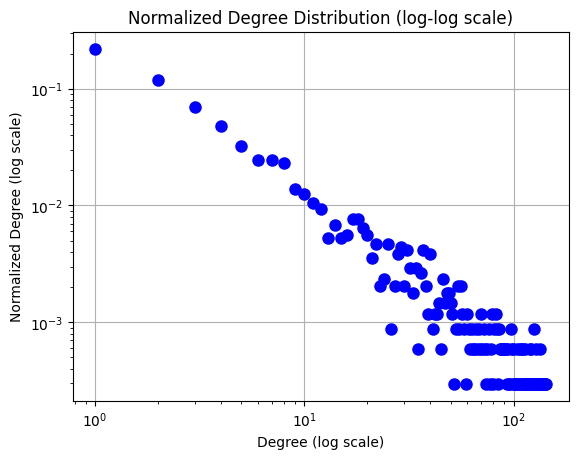

In [24]:
# Normalize the degree values
total_nodes = len(G.nodes())
normalized_degrees = [count / total_nodes for count in degree_hist]

# Remove zero-degree entries (which will cause issues in log-log plotting)
degrees = list(range(len(normalized_degrees)))
normalized_degrees = [deg for deg in normalized_degrees if deg > 0]
degrees = degrees[:len(normalized_degrees)]

# Plot the normalized degree distribution in log-log scale
plt.figure()
plt.loglog(degrees, normalized_degrees, 'o', color='b', markersize=8)
plt.xlabel('Degree (log scale)')
plt.ylabel('Normalized Degree (log scale)')
plt.title('Normalized Degree Distribution (log-log scale)')
plt.grid(True)
plt.show()

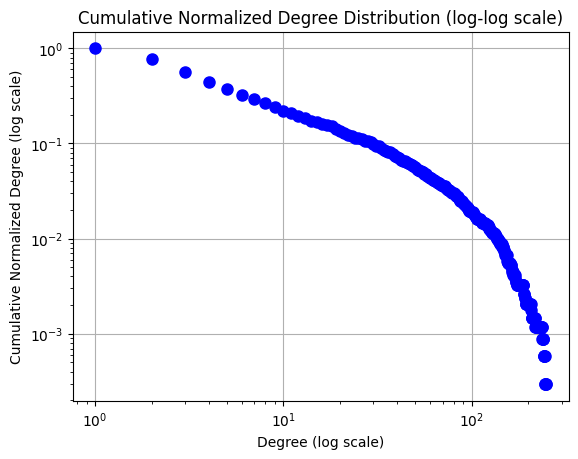

In [25]:
# Calculate the degree histogram
degree_hist = nx.degree_histogram(G)

# Normalize the degree values
total_nodes = len(G.nodes())
normalized_degrees = [count / total_nodes for count in degree_hist]

# Remove zero-degree entries (which will cause issues in log-log plotting)
degrees = list(range(len(normalized_degrees)))
normalized_degrees = [sum(normalized_degrees[i:]) for i in range(len(normalized_degrees))]

# Plot the cumulative degree distribution in log-log scale
plt.figure()
plt.loglog(degrees, normalized_degrees, 'o', color='b', markersize=8)
plt.xlabel('Degree (log scale)')
plt.ylabel('Cumulative Normalized Degree (log scale)')
plt.title('Cumulative Normalized Degree Distribution (log-log scale)')
plt.grid(True)
plt.show()

In [10]:
# Graph density
nx.density(G)

0.003334023334522632

In [11]:
# number of nodes and edges
nx.number_of_nodes(G), nx.number_of_edges(G)

(3397, 19231)

In [12]:
# compute and display the adjacency matrix
nx.adjacency_matrix(G).todense()

array([[0, 1, 0, ..., 0, 0, 0],
       [1, 0, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [13]:
# generate adjacency list (for graph G)
for line in nx.generate_adjlist(G):
  print(line)

AER KZN DYU KIV MSQ TAS TZX EVN KRR DME IST LED OMS SVO SVX LBD VKO KJA NSK
KZN ASF CEK DME EGO LED SVX AYT DWC SHJ FEG SKD TAS ALA SVO DYU LBD IST UFA FRU OSS
ASF MRV DME LED SCO SVO SAW
MRV RTW SAW SCO DXB TAS GYD TLV DME EVN LED SVO SVX DWC DYU VKO
CEK OVB PRG FRU OSS DME DYU EVN LBD LED SVO DWC NMA TAS
OVB SVX BTK IKT MJZ KRR LED PYJ DYU LBD URC KQT PEK NMA TAS KJA NJC NZH OMS SLY GYD TSE FRU OSS KBP ALA BKK CIT DME DXB EVN FEG FRA HKG HTA KHV MUC NSK PRG UUD VVO YKS SVO IST HRB DWC HKT HRG VKO HMA NUX SGC TJM
DME NBC TGK UUA BHK EGO FEG KSQ NMA NVI SKD TIV KRR LED MJZ PYJ RTW DYU LBD AKX CSY ESL GRV IJK MCX PES PEZ SKX ULV VKT VOZ KIV ATH CFU HER KGS RHO SKG BUS DUS FRA MUC TXL HEL MSQ LHR NBE RIX FCO BKK HKG CEE KVK CIT SCO DMB KQT TJU DXB AUH SHJ FRU VIE AZN NCU TAS TMJ UGC KRO AGP ALC BCN MAD PMI OMS GYD NRT MLA OSS GVA ZRH TLV CAI SAW KBP ODS DOH OSW REN AMM AAQ ABA ASB BAX BOJ BTK EVN GOA GOJ HTA IKT KEJ KGD KJA KUF LCA LIS NJC NOZ NSK NUX NYM OGZ PEE PFO PUY PWQ RGK ROV SGC 

In [14]:
nx.diameter(G)

13

In [26]:
nx.average_shortest_path_length(G)

4.103241167898093

In [27]:
nx.average_clustering(G)

0.4883362024529604

# Node analysis

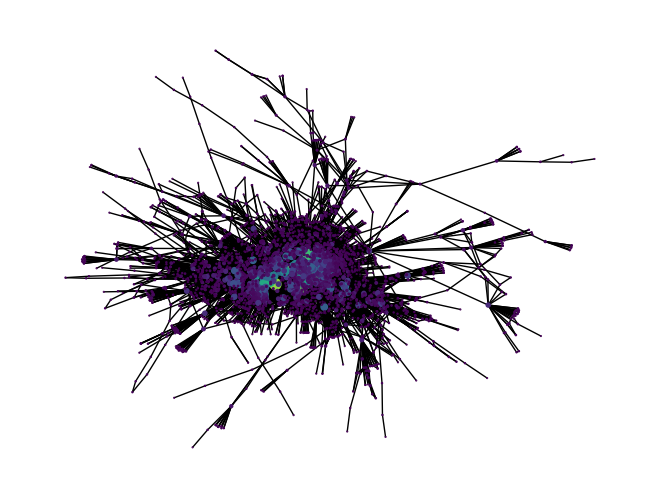

In [28]:
# compute graph degree centrality
centrality = nx.degree_centrality(G)
centrality = np.fromiter(centrality.values(), float)

# draw graph with node's color and size based on degree centrality
nx.draw(G, node_color=centrality, node_size=centrality*1e3)

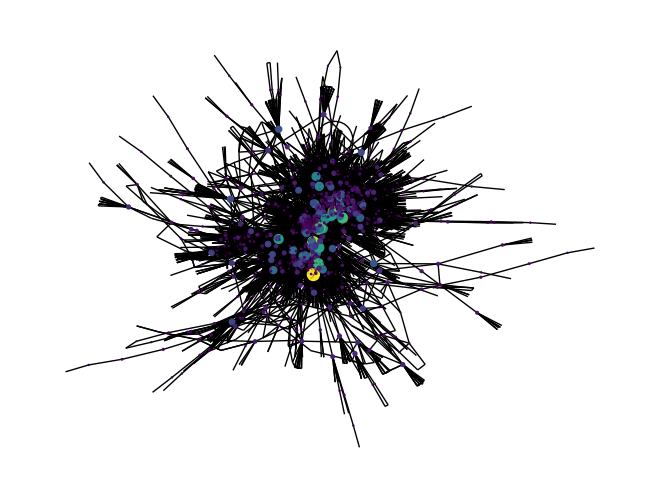

In [30]:
# compute graph betweenness centrality
centrality = nx.betweenness_centrality(G)
centrality = np.fromiter(centrality.values(), float)

# draw graph with node's color and size based on betweenness centrality
nx.draw(G, node_color=centrality, node_size=centrality*1e3)